In [2]:
import kagglehub
import pandas as pd

url = '/content/NBA_2024_per_game(03-01-2024).csv'
df = pd.read_csv(url)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,...,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,0.777,2.1,8.3,10.4,4.0,1.1,1.0,2.7,2.4,22.0
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6


In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
X = df.drop('Player', axis = 1)
y = df['Player']
print(X.shape)
print(y.shape)
print(X)

(538, 28)
(538,)
      Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  ...    FT%  ORB  \
0    C-PF   24  TOT  26   0  17.2  3.0   6.6  0.453  0.5  ...  0.571  2.0   
1       C   24  TOR  25   0  17.5  3.1   6.8  0.459  0.5  ...  0.571  2.0   
2      PF   24  NYK   1   0   9.0  0.0   2.0  0.000  0.0  ...    NaN  1.0   
3       C   26  MIA  23  23  34.1  8.0  15.7  0.506  0.0  ...  0.777  2.1   
4      SG   23  UTA  34  10  21.1  2.6   5.7  0.451  1.2  ...  0.714  0.8   
..    ...  ...  ...  ..  ..   ...  ...   ...    ...  ...  ...    ...  ...   
533    PF   35  TOR   7   0   4.4  0.9   1.4  0.600  0.0  ...  0.333  0.4   
534    PG   25  ATL  30  30  36.6  8.8  20.2  0.436  3.6  ...  0.860  0.5   
535     C   25  UTA  20   6  11.7  1.8   3.5  0.507  0.2  ...  0.750  1.5   
536     C   31  NOP  23   0   9.6  0.6   1.7  0.333  0.0  ...  0.577  1.2   
537     C   26  LAC  32  32  26.9  5.3   8.2  0.644  0.0  ...  0.621  3.2   

     DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    3.4 

In [5]:
df = df[df['Pos'].isin(['SG', 'PG', 'G'])]
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6
6,Nickeil Alexander-Walker,SG,25,MIN,32,11,22.6,2.4,5.8,0.418,...,0.647,0.4,1.3,1.8,2.4,0.9,0.6,1.0,1.9,6.6
7,Grayson Allen,SG,28,PHO,28,28,33.2,4.5,8.8,0.506,...,0.907,0.9,3.5,4.3,2.8,1.0,0.6,1.4,2.2,13.1
9,Jose Alvarado,PG,25,NOP,19,0,16.2,2.4,5.7,0.426,...,0.591,0.5,1.9,2.4,1.8,1.1,0.4,0.9,1.5,6.7
13,Cole Anthony,PG,23,ORL,32,0,24.9,4.8,10.8,0.448,...,0.836,1.1,3.3,4.4,3.5,0.8,0.4,1.8,2.7,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Brandon Williams,PG,24,DAL,1,0,7.0,2.0,3.0,0.667,...,NaN,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0
520,Jeenathan Williams,SG,24,HOU,4,0,5.5,1.5,2.8,0.545,...,0.500,0.0,0.0,0.0,0.5,0.3,0.0,0.0,0.5,3.3
525,Vince Williams Jr.,SG,23,MEM,24,7,20.9,1.5,4.3,0.359,...,0.813,1.0,4.0,5.0,1.6,0.5,0.6,0.8,2.2,5.3
532,Delon Wright,PG,31,WAS,11,0,17.2,1.5,3.6,0.400,...,0.895,0.4,2.1,2.5,3.6,1.5,0.2,0.7,0.8,4.9


In [6]:
columns_to_weight = ['PTS', 'GS', 'AST', 'FGA', 'FG%', '3P', '3P%']
X_weighted = df.copy()

for col in columns_to_weight:
    if col in X_weighted.columns:
        X_weighted[col] = X_weighted[col] * 2
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

if 'MP' in X_weighted.columns:
    X_weighted['MP'] = X_weighted['MP'] * 3
else:
    print("Warning: Column 'MP' not found in the DataFrame.")

numeric_cols = X_weighted.select_dtypes(include=np.number).columns
X_numeric = X_weighted[numeric_cols]
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)
X_imputed_df = pd.DataFrame(X_imputed, columns=numeric_cols, index=X_weighted.index)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_imputed_df)
labels = kmeans.labels_

In [7]:
df['cluster'] = labels
for cluster_num in range(10):
    print(f"\nPlayers in Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['Player'].values)


Players in Cluster 0:
['Dalano Banton' 'Jamaree Bouyea' 'Armoni Brooks' 'Jared Butler'
 'Johnny Davis' 'Dexter Dennis' 'Gradey Dick' 'Trent Forrest'
 'Collin Gillespie' "Devonte' Graham" 'A.J. Green' 'Danny Green'
 'R.J. Hampton' 'Joe Harris' 'Jalen Hood-Schifino' 'Andre Jackson Jr.'
 'Colby Jones' 'Cory Joseph' 'Furkan Korkmaz' 'A.J. Lawson' 'Saben Lee'
 'Kira Lewis Jr.' 'Tre Mann' 'Garrison Mathews' 'Wesley Matthews'
 'Miles McBride' 'Sam Merrill' 'Vasilije Micić' 'Patty Mills'
 'Jalen Pickett' 'Ryan Rollins' 'Dereon Seabron' 'Ben Sheppard'
 'Nick Smith Jr.' 'Jaden Springer' 'Dalen Terry' 'Stanley Umude'
 'Lindy Waters III' 'Blake Wesley']

Players in Cluster 1:
['Grayson Allen' 'RJ Barrett' 'RJ Barrett' 'Malik Beasley' 'Bruce Brown'
 'Kentavious Caldwell-Pope' 'Mike Conley' 'Spencer Dinwiddie'
 'Josh Giddey' 'Eric Gordon' 'Jalen Green' 'James Harden' 'Jrue Holiday'
 'Tyus Jones' 'Kyle Lowry' "De'Anthony Melton" 'Jordan Poole'
 "D'Angelo Russell" 'Dennis Schröder' 'Shaedon Sharpe' '

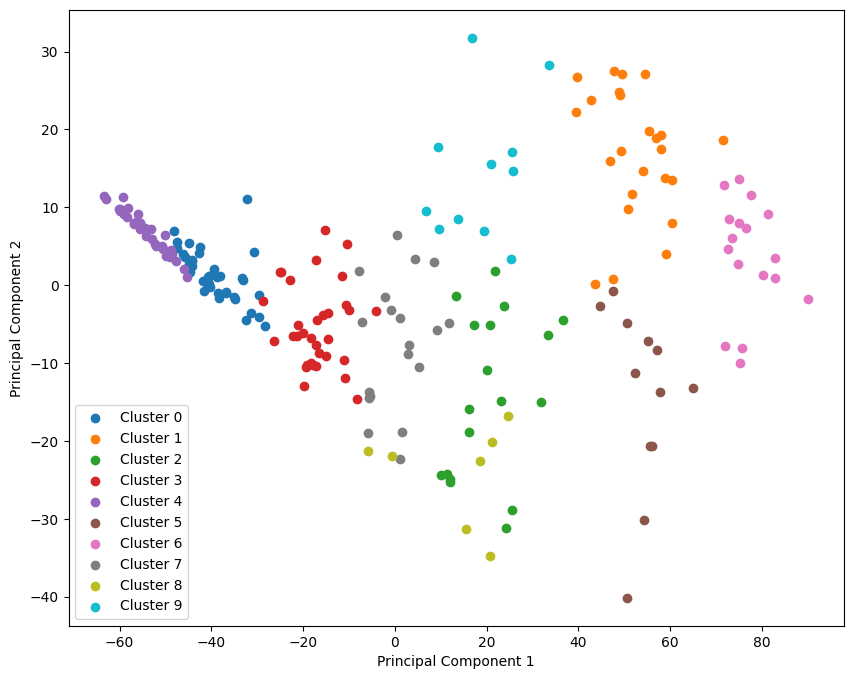

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed_df)

plt.figure(figsize=(10, 8))
for cluster_num in range(10):
    cluster_data = X_pca[df['cluster'] == cluster_num]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_num}')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

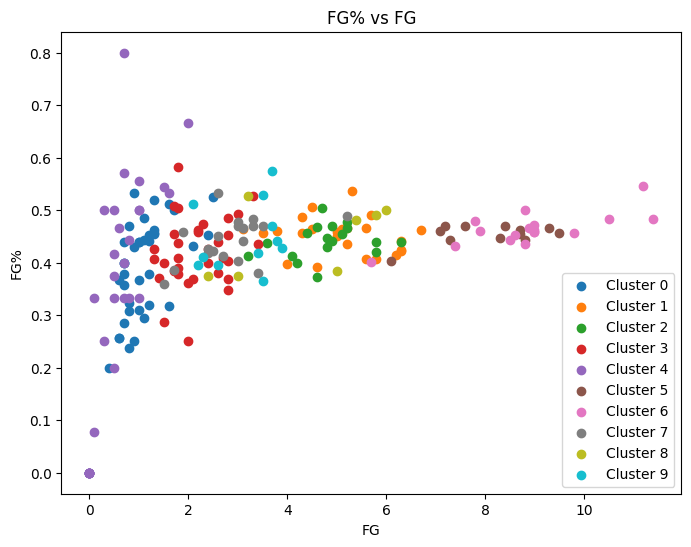

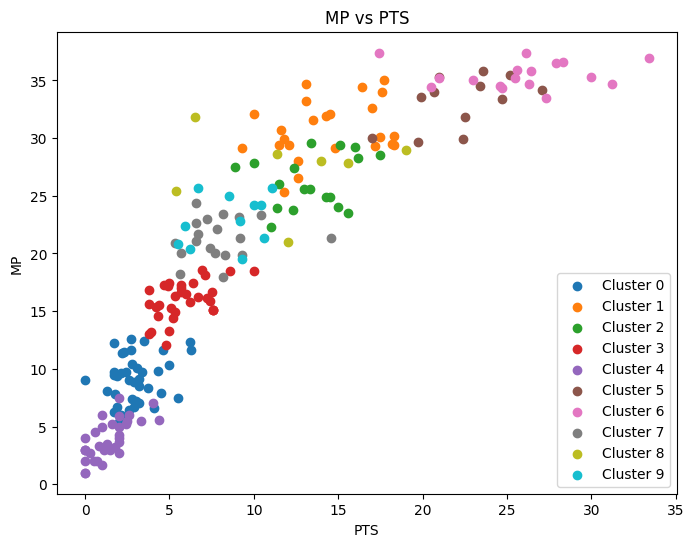

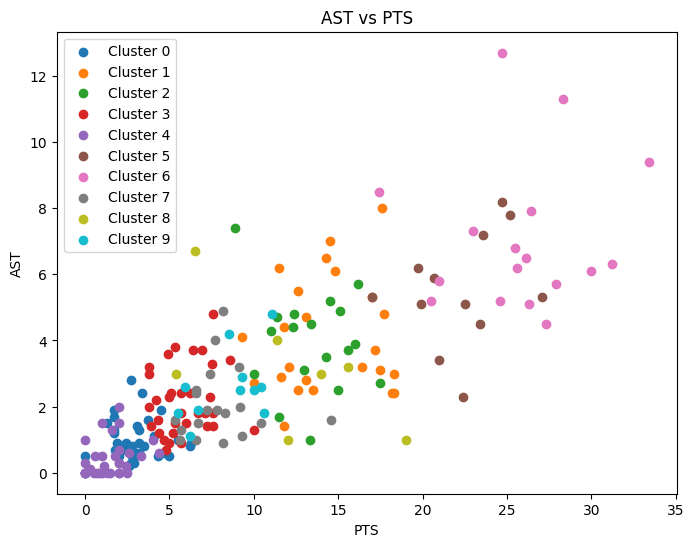

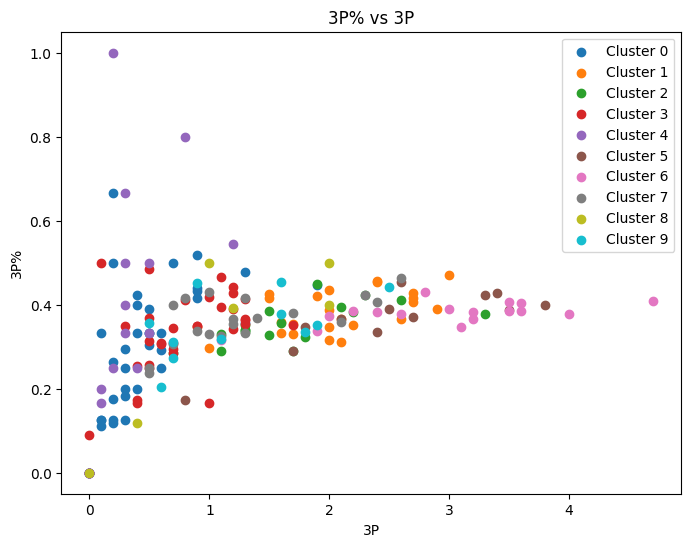

In [9]:
def plot_clusters(x_col, y_col, highlight_cluster=None):
    plt.figure(figsize=(8, 6))
    for cluster_num in range(10):
        cluster_data = df[df['cluster'] == cluster_num]
        plt.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_num}')

        if highlight_cluster is not None and cluster_num == highlight_cluster:
            # Circle around the highlighted cluster
            mean_x = np.mean(cluster_data[x_col])
            mean_y = np.mean(cluster_data[y_col])
            radius = np.max(np.sqrt((cluster_data[x_col] - mean_x)**2 + (cluster_data[y_col] - mean_y)**2))
            circle = plt.Circle((mean_x, mean_y), radius, color='red', fill=False)

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')
    plt.legend()
    plt.show()


plot_clusters('FG', 'FG%', highlight_cluster=6)
plot_clusters('PTS', 'MP', highlight_cluster=6)
plot_clusters('PTS', 'AST', highlight_cluster=6)
plot_clusters('3P', '3P%', highlight_cluster=6)

Based on the graphs and clusters, we can infer that cluster 6 contains the best guards in the league. Not only do they poll the highest among most of the important categories, simple eye-test and current NBA knowledge affirms this.

Cluster 5 trails right behind, which a lot of those players putting up statistics similar to those in cluster 6, but missing out in certain stats such as Games Played, Mintues, Efficiency, or Playmaking (Assists). This players are great as a second option on a championship-caliber team.

Cluster 7 is made up of bench players who put up solid stats, in lesser minutes.

Cluster 2 is made up of high-usage bench players who are usually the sixth-man on their rosters and are the lynchpin of their bench units.

Cluster 1 is also made up of high-scoring and playmakers who are generally the third option on their teams.